In [40]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [10]:
Domestic = pd.read_csv(r"D:\Dataset\-Telangana-Government-Tourism\Data\domestic_visitors.csv")
Foreign = pd.read_csv(r"D:\Dataset\-Telangana-Government-Tourism\Data\foreign_visitors.csv")

In [11]:
# Printing top 5 Rows of Domestic Dataset

Domestic.head()

,district,date,month,year,visitors
0,Adilabad,2016-01-01,January,2016,792136
1,Adilabad,2016-01-02,February,2016,937820
2,Adilabad,2016-01-03,March,2016,582946
3,Adilabad,2016-01-04,April,2016,341948
4,Adilabad,2016-01-05,May,2016,252887


In [12]:
# Printing top 5 Rows of Foreign Dataset

Foreign.head()

,district,date,month,year,visitors
0,Adilabad,2016-01-01,January,2016,2
1,Adilabad,2016-01-02,February,2016,0
2,Adilabad,2016-01-03,March,2016,2
3,Adilabad,2016-01-04,April,2016,0
4,Adilabad,2016-01-05,May,2016,0


In [13]:
print("Domestic Dataset total number of rows and columns :", Domestic.shape[0])
print("Foreign Dataset total number of rows and columns :", Foreign.shape[1])

Domestic Dataset total number of rows and columns : 1482
Foreign Dataset total number of rows and columns : 5


In [14]:
# Checking the null value of Domestic Dataset

Domestic.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [15]:
# Checking the null value of Foreign Dataset

Foreign.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [17]:
# Checking the Duplicate value of Domestic Dataset

Domestic.duplicated().sum()

0

In [18]:
# Checking the Duplicated value of Foreign Dataset

Foreign.duplicated().sum()

0

In [22]:
Foreign.rename(columns={'visitors': 'foriegn_visitors'}, inplace=True)

In [24]:
Domestic.rename(columns={'visitors': 'domestic_visitors'}, inplace=True)

In [25]:
df = pd.concat([Foreign, Domestic['domestic_visitors']], axis=1)

In [26]:
df.isnull().sum()

district              0
date                  0
month                 0
year                  0
foriegn_visitors      0
domestic_visitors    30
dtype: int64

In [27]:
df.fillna(0, inplace=True)

In [28]:
df.isnull().sum()

district             0
date                 0
month                0
year                 0
foriegn_visitors     0
domestic_visitors    0
dtype: int64

In [29]:
df.shape

(1512, 6)

In [31]:
df.domestic_visitors = df.domestic_visitors.astype(int)
df.year = df.year.astype(int)

In [33]:
df['tota_visitors'] = df['domestic_visitors'] + df['foriegn_visitors']

In [34]:
df.head()

,district,date,month,year,foriegn_visitors,domestic_visitors,tota_visitors
0,Adilabad,2016-01-01,January,2016,2,792136,792138
1,Adilabad,2016-01-02,February,2016,0,937820,937820
2,Adilabad,2016-01-03,March,2016,2,582946,582948
3,Adilabad,2016-01-04,April,2016,0,341948,341948
4,Adilabad,2016-01-05,May,2016,0,252887,252887


In [35]:
df.head(2)

,district,date,month,year,foriegn_visitors,domestic_visitors,tota_visitors
0,Adilabad,2016-01-01,January,2016,2,792136,792138
1,Adilabad,2016-01-02,February,2016,0,937820,937820


In [36]:
grouped_data = df.groupby('district')['domestic_visitors'].sum()

In [37]:
top_10_districts = grouped_data.sort_values(ascending=False).head(10)

In [38]:
pd.DataFrame(top_10_districts)

,domestic_visitors
district,
Hyderabad,73184713
Warangal (Urban),40881415
Rajanna Sircilla,26654379
Bhadradri Kothagudem,22585587
Jayashankar Bhoopalpally,20978330
Adilabad,19363417
Medak,15090069
Mahbubnagar,14915113
Nizamabad,12024670


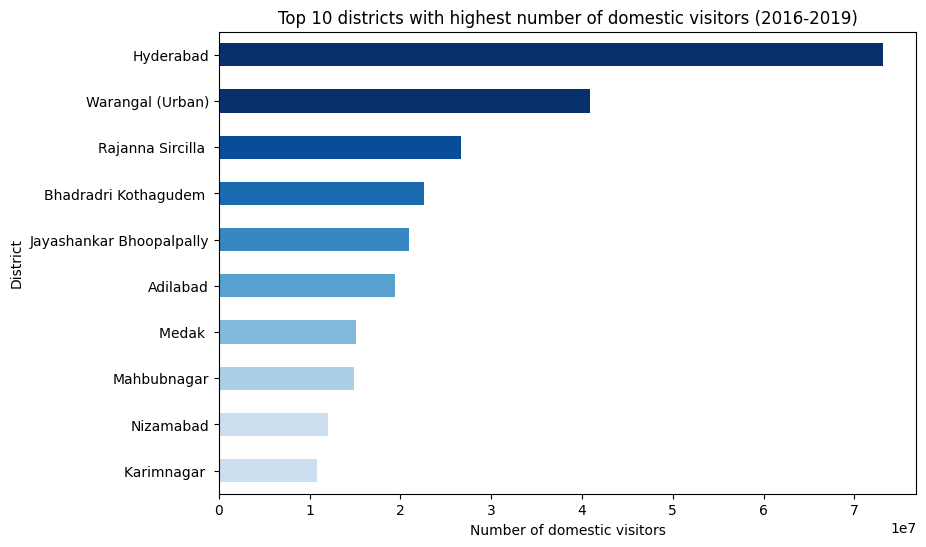

In [43]:
plt.figure(figsize=(9,6))

# Define the number of colors in the gradient
n_colors = 10

# Create a color map from the 'Blues' colormap
cmap = plt.cm.get_cmap('Blues', n_colors)

# Generate a sequence of colors from dark to light
colors = cmap(np.linspace(0.2, 1.0, n_colors))

# Plot the top 10 districts in a horizontal bar chart with the color gradient
top_10_districts.sort_values(ascending=True).plot(kind='barh', color=colors)

# Set the title and axis labels
plt.title('Top 10 districts with highest number of domestic visitors (2016-2019)')
plt.xlabel('Number of domestic visitors')
plt.ylabel('District')

# Display the plot
plt.show()
